In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import statsmodels.api as sm 

# Display preferences
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
#load the dataset from the weatherinszeged table from Thinkful's database.

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# No need for an open connection, because you're only doing a single query
engine.dispose()
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
#build a linear regression model.target variable is the difference between apparenttemperature and temperature. 
#As explanatory variables, use humidity and windspeed. 
#Now, estimate your model using OLS.
#What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?

In [17]:
Y=weather_df['apparenttemperature']-weather_df['temperature']
X=weather_df[['humidity','windspeed']]
X=sm.add_constant(X)
result1=sm.OLS(Y,X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:17:13   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. 
#Now, what is the R-squared of this model? Does this model improve upon the previous one?

In [9]:
weather_df['humid_wind']=weather_df['humidity']*weather_df['windspeed']
Y=weather_df['apparenttemperature']-weather_df['temperature']
X=weather_df[['humidity','windspeed','humid_wind']]
X=sm.add_constant(X)
result2=sm.OLS(Y,X).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:09:25   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.033      2.511      0.012       0.018       0.149
humidity       0.1775      0.043      4.133      0.000       0.093       0.262
windspeed      0.0905      0.002     36.797      0.000       0.086       0.095
humid_wind    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Add visibility as an additional explanatory variable to the first model and estimate it. 
# Did R-squared increase? What about adjusted R-squared? 
# Compare the differences put on the table by the interaction term and the visibility in terms of the improvement 
# in the adjusted R-squared. Which one is more useful?

In [10]:
Y=weather_df['apparenttemperature']-weather_df['temperature']
X=weather_df[['humidity','windspeed','visibility']]
X=sm.add_constant(X)
result3=sm.OLS(Y,X).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:09:33   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5756      0.028     56.605      0.000       1.521       1.630
humidity      -2.6066      0.025   -102.784      0.000      -2.656      -2.557
windspeed     -0.1199      0.001   -179.014      0.000      -0.121      -0.119
visibility     0.0540      0.001     46.614      0.000       0.052       0.056
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
Y=weather_df['apparenttemperature']-weather_df['temperature']
weather_df['humid_wind']=weather_df['humidity']*weather_df['windspeed']
X=weather_df[['humidity','windspeed','visibility','humid_wind']]
X=sm.add_constant(X)
result4=sm.OLS(Y,X).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.377e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:11:09   Log-Likelihood:            -1.6504e+05
No. Observations:               96453   AIC:                         3.301e+05
Df Residuals:                   96448   BIC:                         3.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1006      0.039    -28.459      0.000      -1.176      -1.025
humidity       0.8909      0.044     20.263      0.000       0.805       0.977
windspeed      0.1033      0.002     42.579      0.000       0.099       0.108
visibility     0.0646      0.001     58.051      0.000       0.062       0.067
humid_wind    -0.3164      0.003    -95.355      0.000      -0.323      -0.310
==============================================================================
Omnibus:                     5328.364   Durbin-Watson:                   0.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11525.074
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print('adjusted R-squared when explanatories are humidity and windspeed: {}'.format(result1.rsquared_adj))
print('adjusted R-squared when explanatories are humidity, windspeed and interaction: {}'.format(result2.rsquared_adj))
print('adjusted R-squared when explanatories are humidity and windspeed and visibility: {}'.format(result3.rsquared_adj))
print('adjusted R-squared when explanatories are interaction term and the visibility: {}'.format(result4.rsquared_adj))

adjusted R-squared when explanatories are humidity and windspeed: 0.2878035541321222
adjusted R-squared when explanatories are humidity, windspeed and interaction: 0.34125381221878315
adjusted R-squared when explanatories are humidity and windspeed and visibility: 0.30348743781997345
adjusted R-squared when explanatories are interaction term and the visibility: 0.36348670525665217


In [ ]:
# Choose the best one from the three models above with respect to their AIC and BIC scores. 
# Validate your choice by discussing your justification with your mentor.

In [19]:
print('AIC ,BIC when explanatories are humidity and windspeed: {}, {}'.format(result1.aic,result1.bic))
print('AIC ,BIC when explanatories are humidity, windspeed and interaction: {}, {}'.format(result2.aic,result2.bic))
print('AIC ,BIC when explanatories are humidity and windspeed and visibility: {}, {}'.format(result3.aic,result3.bic))
print('AIC ,BIC when explanatories are interaction term and the visibility: {}, {}'.format(result4.aic,result4.bic))

AIC ,BIC when explanatories are humidity and windspeed: 340916.92494235863, 340945.3553757248
AIC ,BIC when explanatories are humidity, windspeed and interaction: 333393.0990014516, 333431.0062459398
AIC ,BIC when explanatories are humidity and windspeed and visibility: 338770.11420270964, 338808.0214471978
AIC ,BIC when explanatories are interaction term and the visibility: 330082.57735863, 330129.96141424024


The last model has higher R-square and lower AIC, BIC there fore better model.

# 2. House prices model

In [29]:
# Load the houseprices data from Thinkful's database.

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)
houseprices_df.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500


In [30]:
# Run your house prices model again and assess the goodness of fit of your model using an 
# F-test, R-squared, adjusted R-squared, AIC, and BIC.

In [31]:
houseprices_df.select_dtypes('object').columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [33]:
new_df=houseprices_df[['mszoning','street','landcontour']]
new_df=pd.get_dummies(new_df,drop_first=True)
new_numeric=houseprices_df[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf']]

In [34]:
X=pd.concat([new_df,new_numeric],axis=1)
Y=houseprices_df['saleprice']

In [35]:
X=sm.add_constant(X)
result=sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     356.5
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:01:49   Log-Likelihood:                -17454.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1445   BIC:                         3.502e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.402e+05   1.82e+04     -7.693      0.000   -1.76e+05   -1.04e+05
mszoning_FV      3.123e+04   1.36e+04      2.302      0.021    4613.537    5.78e+04
mszoning_RH       1.95e+04   1.57e+04      1.241      0.215   -1.13e+04    5.03e+04
mszoning_RL      3.244e+04   1.26e+04      2.571      0.010    7686.722    5.72e+04
mszoning_RM      1.455e+04   1.28e+04      1.139      0.255   -1.05e+04    3.96e+04
street_Pave     -1556.3550   1.62e+04     -0.096      0.923   -3.33e+04    3.02e+04
landcontour_HLS  3.797e+04   7310.426      5.195      0.000    2.36e+04    5.23e+04
landcontour_Low  4.253e+04   8050.243      5.283      0.000    2.67e+04    5.83e+04
landcontour_Lvl  1.916e+04   5022.721      3.816      0.000    9311.590     2.9e+04
overallqual      2.331e+04   1092.670     21.333      0.000    2.12e+04    2.55e+04
grlivarea          45.6153      2.639     17.287      0.000      40.439      50.791
garagecars       1.268e+04   2957.202      4.289      0.000    6881.421    1.85e+04
garagearea         14.2311     10.315      1.380      0.168      -6.003      34.466
totalbsmtsf        22.7772      4.217      5.401      0.000      14.505      31.049
firstflrsf          7.9247      4.996      1.586      0.113      -1.876      17.725
==============================================================================
Omnibus:                      400.532   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34868.737
Skew:                           0.051   Prob(JB):                         0.00
Kurtosis:                      26.941   Cond. No.                     6.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
print(' F-test: {}, \n R-squared: {}, \n adjusted R-squared: {}, \n AIC: {}, \n and BIC: {}'.format(result.fvalue,result.rsquared,result.rsquared_adj,result.aic,result.bic))

 F-test: 356.4612572756617, 
 R-squared: 0.7754627426055101, 
 adjusted R-squared: 0.7732872951290237, 
 AIC: 34937.22158696677, 
 and BIC: 35016.51446268731


In [ ]:
# Do you think that your model is satisfactory? If so, why? 
Still we can have better result

In [ ]:
# In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.

In [71]:
new_df=houseprices_df[['neighborhood','bldgtype','heatingqc']]
new_df=pd.get_dummies(new_df,drop_first=True)
new_numeric=houseprices_df[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf']]
X=pd.concat([new_df,new_numeric],axis=1)
Y=houseprices_df['saleprice']
X=sm.add_constant(X)
result=sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:00:45   Log-Likelihood:                -17286.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1421   BIC:                         3.486e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.801e+04   1.19e+04     -1.509      0.132   -4.14e+04    5407.928
neighborhood_Blueste  5550.5261   2.59e+04      0.215      0.830   -4.52e+04    5.63e+04
neighborhood_BrDale   2663.7886   1.33e+04      0.200      0.841   -2.34e+04    2.87e+04
neighborhood_BrkSide -1.975e+04   1.06e+04     -1.860      0.063   -4.06e+04    1082.176
neighborhood_ClearCr  9618.9291   1.14e+04      0.844      0.399   -1.27e+04     3.2e+04
neighborhood_CollgCr -6045.8488   9584.419     -0.631      0.528   -2.48e+04    1.28e+04
neighborhood_Crawfor  9057.9259   1.04e+04      0.867      0.386   -1.14e+04    2.95e+04
neighborhood_Edwards -2.375e+04   1.01e+04     -2.355      0.019   -4.35e+04   -3971.671
neighborhood_Gilbert  -1.12e+04   1.01e+04     -1.104      0.270   -3.11e+04    8695.343
neighborhood_IDOTRR  -3.177e+04   1.13e+04     -2.802      0.005    -5.4e+04   -9527.877
neighborhood_MeadowV  1.446e+04   1.25e+04      1.153      0.249   -1.01e+04     3.9e+04
neighborhood_Mitchel -1.218e+04   1.05e+04     -1.163      0.245   -3.27e+04    8365.155
neighborhood_NAmes    -1.73e+04   9755.050     -1.774      0.076   -3.64e+04    1831.142
neighborhood_NPkVill  6671.7963   1.45e+04      0.461      0.645   -2.17e+04     3.5e+04
neighborhood_NWAmes  -1.763e+04   1.02e+04     -1.731      0.084   -3.76e+04    2354.343
neighborhood_NoRidge  4.729e+04   1.08e+04      4.396      0.000    2.62e+04    6.84e+04
neighborhood_NridgHt  5.504e+04   9719.265      5.663      0.000     3.6e+04    7.41e+04
neighborhood_OldTown -3.729e+04   1.01e+04     -3.686      0.000   -5.71e+04   -1.74e+04
neighborhood_SWISU   -3.564e+04   1.19e+04     -2.998      0.003    -5.9e+04   -1.23e+04
neighborhood_Sawyer  -1.508e+04   1.03e+04     -1.459      0.145   -3.53e+04    5190.973
neighborhood_SawyerW -8952.0446   1.01e+04     -0.884      0.377   -2.88e+04    1.09e+04
neighborhood_Somerst  1.115e+04   9657.213      1.155      0.248   -7790.234    3.01e+04
neighborhood_StoneBr  6.397e+04    1.1e+04      5.836      0.000    4.25e+04    8.55e+04
neighborhood_Timber   7201.2609   1.07e+04      0.672      0.502   -1.38e+04    2.82e+04
neighborhood_Veenker  3.358e+04   1.35e+04      2.485      0.013    7070.288    6.01e+04
bldgtype_2fmCon      -4630.1678   6432.172     -0.720      0.472   -1.72e+04    7987.406
bldgtype_Duplex      -2.004e+04   5167.468     -3.879      0.000   -3.02e+04   -9905.921
bldgtype_Twnhs       -4.389e+04   6866.868     -6.392      0.000   -5.74e+04   -3.04e+04
bldgtype_TwnhsE      -3.087e+04   4316.945     -7.150      0.000   -3.93e+04   -2.24e+04
heatingqc_Fa         -1.084e+04   5329.931     -2.034      0.042   -2.13e+04    -384.419
heatingqc_Gd         -7346.3709   2769.229     -2.653      0.008   -1.28e+04   -1914.156
heatingqc_Po         -2.278e+04   3.46e+04     -0.658    

# Chi-Squared Feature Selection

In [55]:
cat_df=houseprices_df.select_dtypes('object').columns
X=houseprices_df[cat_df].drop(['condition2','roofstyle','exterior1st','electrical','poolqc','miscfeature'],axis=1)
y=houseprices_df['saleprice']
X = X.astype(str)

from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1022, 37) (1022,)
Test (438, 37) (438,)


In [57]:
# prepare input data
from sklearn.preprocessing import OrdinalEncoder
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

Feature 0: 73.517789
Feature 1: 0.843670
Feature 2: 29.546964
Feature 3: 616.359369
Feature 4: 93.401515
Feature 5: 169.333333
Feature 6: 460.689145
Feature 7: 598.455854
Feature 8: 1701.105156
Feature 9: 189.009779
Feature 10: 1492.898809
Feature 11: 638.483201
Feature 12: 164.140399
Feature 13: 625.187597
Feature 14: 122.924871
Feature 15: 133.924032
Feature 16: 71.969199
Feature 17: 244.719920
Feature 18: 389.961114
Feature 19: 129.140713
Feature 20: 371.042877
Feature 21: 824.184930
Feature 22: 117.374855
Feature 23: 66.476582
Feature 24: 1162.841294
Feature 25: 40.308423
Feature 26: 204.433919
Feature 27: 69.904129
Feature 28: 246.384181
Feature 29: 926.636116
Feature 30: 475.422929
Feature 31: 102.177479
Feature 32: 68.121274
Feature 33: 66.293847
Feature 34: 155.224154
Feature 35: 171.793500
Feature 36: 165.566351


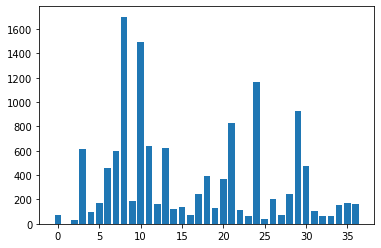

In [59]:
import matplotlib.pyplot as plt
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [63]:
X_train.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'bldgtype',
       'housestyle', 'roofmatl', 'exterior2nd', 'masvnrtype', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair',
       'kitchenqual', 'functional', 'fireplacequ', 'garagetype',
       'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'fence',
       'saletype', 'salecondition'],
      dtype='object')

In [64]:
X_train.head(2)

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,fence,saletype,salecondition
632,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,None,WD,Family
208,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,Po,Attchd,RFn,TA,TA,Y,GdWo,WD,Normal
